<a href="https://colab.research.google.com/github/Yoojin730/YBIGTA/blob/master/ML_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML 과제

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 0. Titanic 데이터 로드 및 훓어보기

In [21]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('/content/gdrive/MyDrive/YBIGTA/2021. 1. 26 (화) ML 심화/과제/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 데이터 타입
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
#결측치
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#target의 imbalance 여부를 확인
titanic.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [24]:
titanic = titanic.dropna(axis = 0)

In [25]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!

titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

In [26]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [27]:
titanic['Sex'].unique()

array(['female', 'male'], dtype=object)

In [28]:
titanic['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [29]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요

titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,C
3,1,1,0,35.0,1,0,53.1000,S
6,0,1,1,54.0,0,0,51.8625,S
10,1,3,0,4.0,1,1,16.7000,S
11,1,1,0,58.0,0,0,26.5500,S


In [30]:
titanic['Embarked'] = titanic['Embarked'].map({'C':0,'Q':1,'S':2})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,2
10,1,3,0,4.0,1,1,16.7000,2
11,1,1,0,58.0,0,0,26.5500,2


### 1. Train-Test split & 종속변수-설명변수 분할

In [31]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [37]:
# train-test split 및 종속변수-설명변수 분할을 진행해주세요

y = titanic.Survived
X = titanic.drop('Survived', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

### 2. Decision Tree를 통한 Classification

In [38]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

import math 

def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

def get_ig(data, split_criterion, target):
  entropy_original = get_entropy(data[target])
  values = data[split_criterion].unique()

  subset1 = data[data[split_criterion] == values[0]]
  subset2 = data[data[split_criterion] == values[1]]
  subset3 = data[data[split_criterion] == values[2]]
  
  to_subtract = 0
  for subset in [subset1,subset2,subset3]:
    prob = (subset.shape[0]/data.shape[0])
    to_subtract += prob * get_entropy(subset[target])

  return entropy_original - to_subtract



##reference :https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293

In [ ]:
# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.

calc_information_gain(titanic, 'Pclass', 'Survived')

In [40]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요

from sklearn.tree import DecisionTreeClassifier
X_train = X_train.fillna(X_train.mean())
dt_clf=DecisionTreeClassifier(criterion='entropy', min_samples_split=3, random_state=156)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

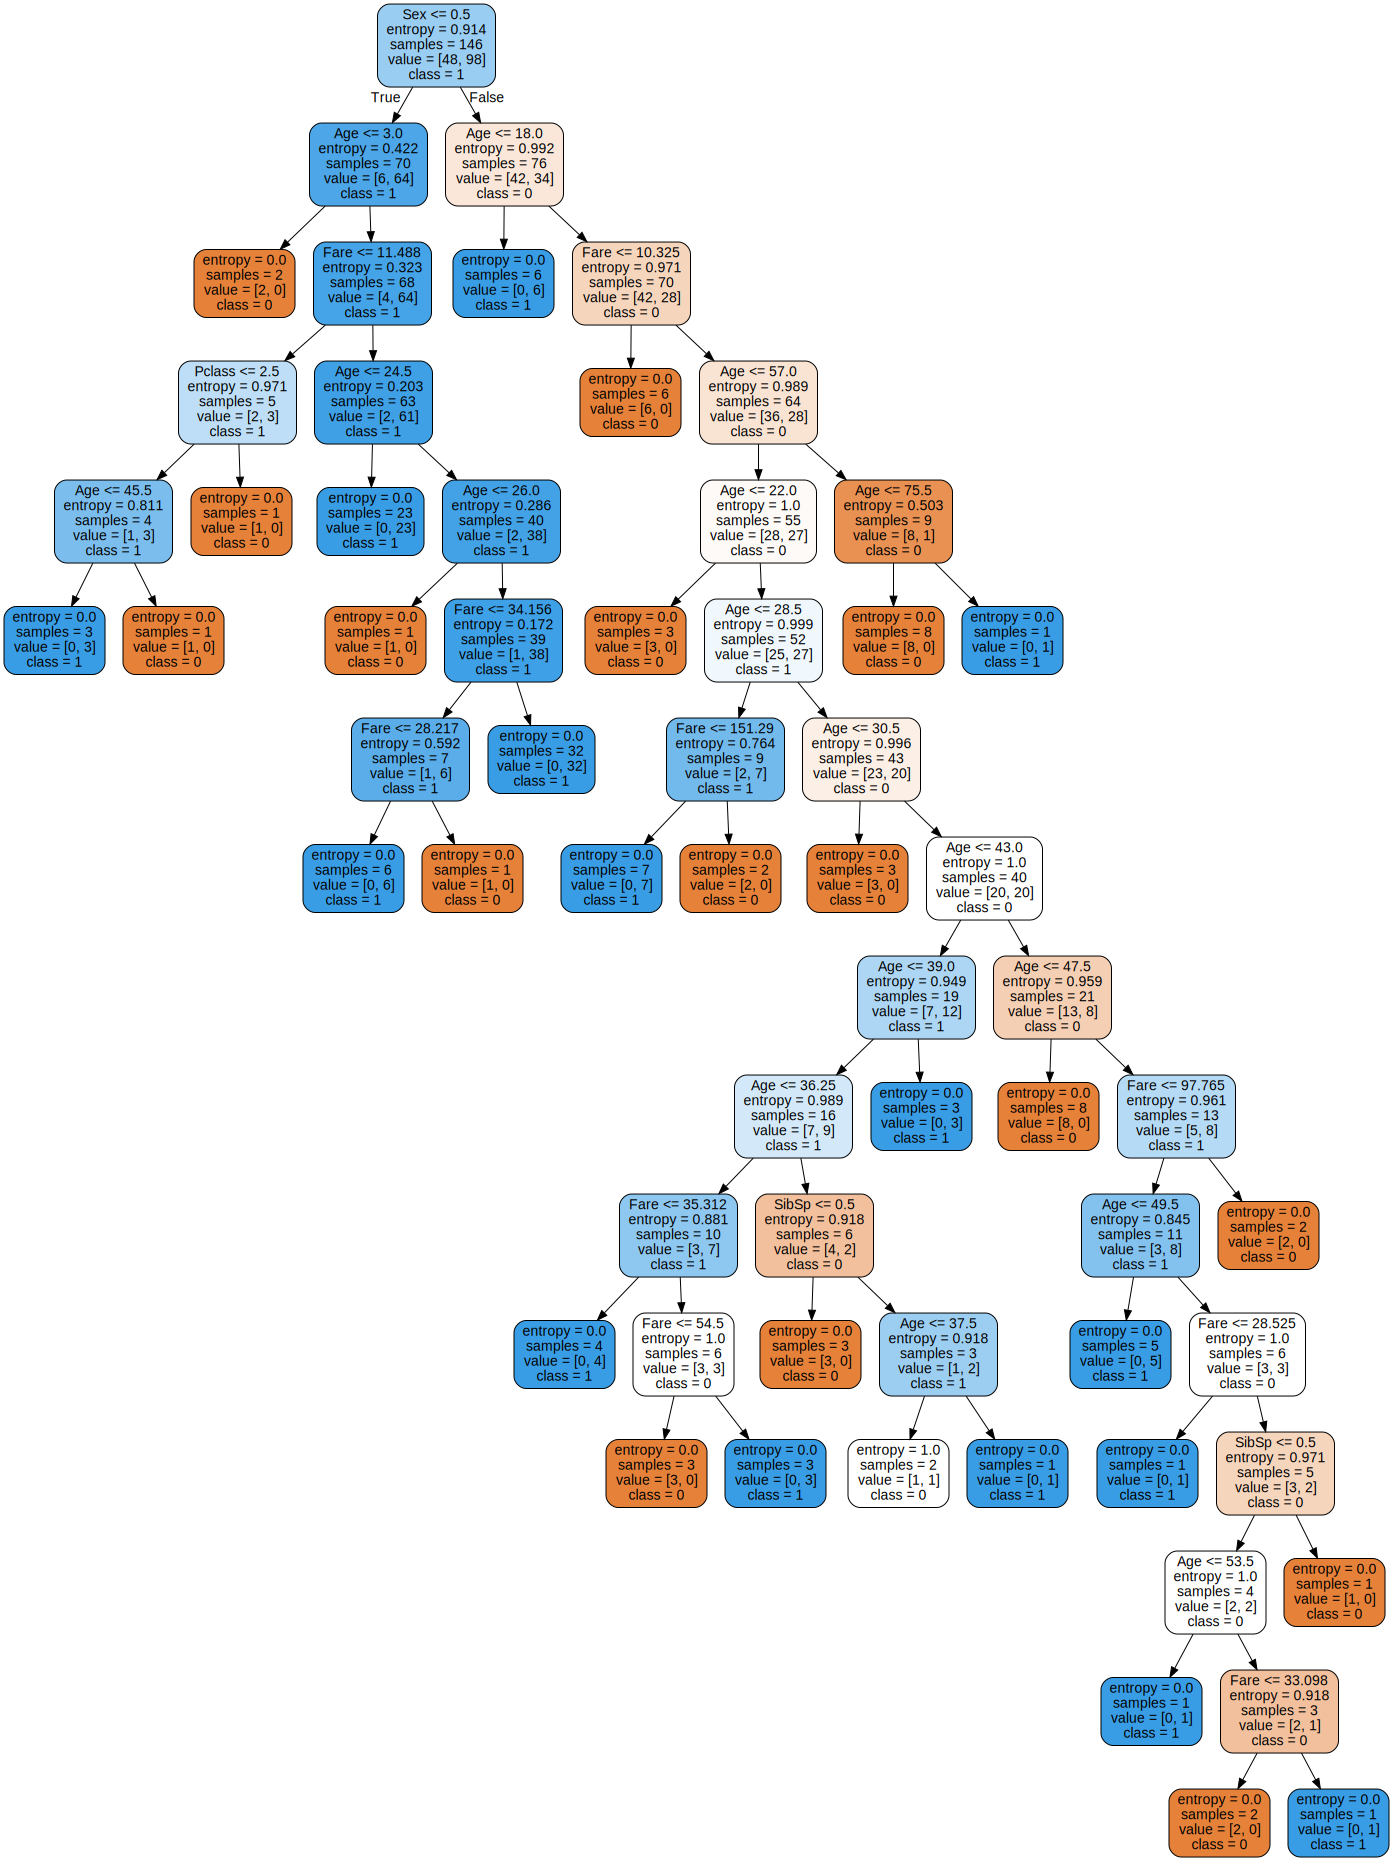

In [41]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file=("titanic_hw.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 4. 결과 확인

In [42]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
y_pred = dt_clf.predict(X_test)

print('Accuracy:: {}'.format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("ROC AUC Score: {}".format(roc_auc_score(y_test, y_pred)))
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy:: 0.7837837837837838
F1 score: 0.851851851851852
ROC AUC Score: 0.71
   0   1
0  6   6
1  2  23
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.79      0.92      0.85        25

    accuracy                           0.78        37
   macro avg       0.77      0.71      0.73        37
weighted avg       0.78      0.78      0.77        37



### 5. GridSearch를 통한 Tree pruning

In [43]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.


from sklearn.model_selection import GridSearchCV

pruned_dt_dlf = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
max_depth = [3,4,5,6,7]
splitter = ['best', 'random']

param_grid = {'criterion': criterion,
                 'max_depth': max_depth,
                 'splitter': splitter}

grid_search = GridSearchCV(pruned_dt_dlf, param_grid, scoring = 'f1')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [44]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.
print('GridSearch 최적 parameter: {}'.format(grid_search.best_params_),
     'GridSearch Validation Score: {:.3f}'.format(grid_search.best_score_),
     'GridSearch Test score: {:.3f}'.format(grid_search.score(X_test, y_test)), sep='\n')


GridSearch 최적 parameter: {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
GridSearch Validation Score: 0.810
GridSearch Test score: 0.875


In [ ]:
'''
GridSearch에 사용한 parameter가 Decision Tree 모델 학습에서 어떤 역할?

DecisionTreeClassifier() criterion : decision tree의 분류 기준인 불순도 지표를 정한다. (default = gini)

max_features : 최적의 분할을 위해 고려할 최대 feature 개수

max_depth : tree의 최대 깊이
default = None 완벽하게 Class 값이 결정될 때까지 분할하거나 데이터의 개수가 min_sample_split 보다 작아질 때까지 분할
분류가 끝나지 않았더라도 노드가 max_depth이상으로 분할되지 않음

min_sample_split : 분할 전 최소한의 샘플 수 
default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

splitter: 각 node를 분리하는 데 사용되는 방법 (default = best, ['best', 'random']이 존재)

min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플 수
min_samples_split과 함께 과적합 제어 용도
이것보다 샘플 수가 낮으면 leaf로 확정되고 더이상 분할하지 않음
불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요


###reference : https://injo.tistory.com/15 ###

'''
